<a href="https://colab.research.google.com/github/Patryk-jpg/ExercisesPython/blob/main/Copy_of_fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.head()

--2022-11-07 22:50:17--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 104.26.3.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-11-07 22:50:17 (42.9 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
print(dataset.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
dataset.sex = dataset.sex.map({'female':1, 'male':2})
dataset.smoker = dataset.smoker.map({'yes' :1 ,'no': 2})
dataset.region = dataset.region.map({'southwest':1 , 'southeast':2,'northwest':3,'northeast':4})
print(dataset)
#dataset = pd.get_dummies(dataset,columns = ['sex'],prefix='sex', prefix_sep='')  I tested this but its not neccesary i think
#dataset = pd.get_dummies(dataset,columns = ['region'],prefix='region', prefix_sep='')
#dataset = pd.get_dummies(dataset,columns = ['smoker'],prefix='smokes', prefix_sep='')
dataset.tail()  

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       1  16884.92
1      18    2  33.8         1       2       2   1725.55
2      28    2  33.0         3       2       2   4449.46
3      33    2  22.7         0       2       3  21984.47
4      32    2  28.9         0       2       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    2  31.0         3       2       3  10600.55
1334   18    1  31.9         0       2       4   2205.98
1335   18    1  36.9         0       2       2   1629.83
1336   21    1  25.8         0       2       1   2007.95
1337   61    1  29.1         0       1       3  29141.36

[1338 rows x 7 columns]


,age,sex,bmi,children,smoker,region,expenses
1333,50,2,31.0,3,2,3,10600.55
1334,18,1,31.9,0,2,4,2205.98
1335,18,1,36.9,0,2,2,1629.83
1336,21,1,25.8,0,2,1,2007.95
1337,61,1,29.1,0,1,3,29141.36


In [ ]:



train_dataset = dataset.sample(frac= 0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_Labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')
print(train_dataset)
print(test_labels)


print(test_dataset)


      age  sex   bmi  children  smoker  region
578    52    2  30.2         1       2       1
610    47    1  29.4         1       2       2
569    48    2  40.6         2       1       3
1034   61    2  38.4         0       2       3
198    51    1  18.1         0       2       3
...   ...  ...   ...       ...     ...     ...
584    19    2  20.7         0       2       1
147    51    1  37.7         1       2       2
160    42    1  26.6         0       1       3
750    37    1  26.4         0       1       2
859    57    2  28.1         0       2       1

[1070 rows x 6 columns]
11      27808.73
23      37701.88
24       6203.90
25      14001.13
28       2775.19
          ...   
1305     2464.62
1315    11272.33
1318    19496.72
1326     7050.02
1333    10600.55
Name: expenses, Length: 268, dtype: float64
      age  sex   bmi  children  smoker  region
11     62    1  26.3         0       1       2
23     34    1  31.9         1       1       4
24     37    2  28.0         2       2 

In [ ]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(np.array(train_dataset))

In [ ]:
model = keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(1024, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(1024,activation= 'relu'),
    tf.keras.layers.Dense(1,activation = 'relu')
])
model.summary()

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_absolute_error', metrics = ['MAE','MSE'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1024)              7168      
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,057,806
Trainable params: 1,057,793
Non-trainable params: 13
_____________________________________________

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=15,
    min_delta=0.001,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(train_dataset, train_Labels, epochs= 100, validation_split = 0.2 ,verbose = 1, callbacks=[early_stopping])

Epoch 1/100
27/27 [==============================] - 1s 26ms/step - loss: 5119.7607 - MAE: 5119.7607 - MSE: 69530568.0000 - val_loss: 3270.4180 - val_MAE: 3270.4180 - val_MSE: 34102444.0000
Epoch 2/100
27/27 [==============================] - 0s 14ms/step - loss: 3411.4812 - MAE: 3411.4812 - MSE: 33699836.0000 - val_loss: 3643.1536 - val_MAE: 3643.1536 - val_MSE: 36742848.0000
Epoch 3/100
27/27 [==============================] - 0s 15ms/step - loss: 3204.2393 - MAE: 3204.2393 - MSE: 30766972.0000 - val_loss: 2629.7273 - val_MAE: 2629.7273 - val_MSE: 23359416.0000
Epoch 4/100
27/27 [==============================] - 0s 14ms/step - loss: 2712.6135 - MAE: 2712.6135 - MSE: 25194412.0000 - val_loss: 3045.5046 - val_MAE: 3045.5046 - val_MSE: 29130992.0000
Epoch 5/100
27/27 [==============================] - 0s 14ms/step - loss: 2909.2544 - MAE: 2909.2544 - MSE: 26634460.0000 - val_loss: 3170.8335 - val_MAE: 3170.8335 - val_MSE: 24358812.0000
Epoch 6/100
27/27 [==============================]

In [ ]:
print(model.evaluate(test_dataset, test_labels, verbose =2))


9/9 - 0s - loss: 2170.6221 - MAE: 2170.6221 - MSE: 30595350.0000 - 31ms/epoch - 3ms/step
[2170.6220703125, 2170.6220703125, 30595350.0]


In [ ]:
print(test_dataset.iloc[4])
print(model.predict(np.array(test_dataset.iloc[4])))
print(test_labels.iloc[4])

age         23.0
sex          2.0
bmi         17.4
children     1.0
smoker       2.0
region       3.0
Name: 28, dtype: float64
1/1 [==============================] - 0s 13ms/step
[[2823.398]]
2775.19


9/9 - 0s - loss: 2170.6221 - MAE: 2170.6221 - MSE: 30595350.0000 - 33ms/epoch - 4ms/step
Testing set Mean Abs Error: 2170.62 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


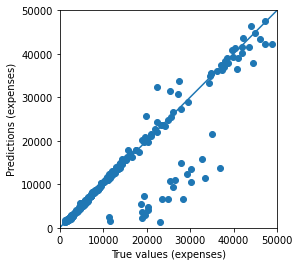

In [ ]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
